# TP4 - Correction - Descente de gradient en 2 variables

### Import des librairies

In [1]:
from matplotlib import pyplot as plt
import numpy as np

> On définit une fonction python permettant de dessiner les courbes de niveaux d'une fonction de 2 variables

In [2]:
def courbes_de_niveaux(fct, x1_min=-5, x2_min=-5, x1_max=5, x2_max=5):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = [[fct(x1,x2) for x1 in x1_values] for x2 in x2_values]
    plt.contour(x1_values, x2_values, fct_values, 40)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.colorbar()
    plt.xlabel('$b$')
    plt.ylabel('$w$')

Fonction Python permettant de dessiner la trajectoire de l'algorithme
de descente de gradient

In [3]:
# W sous la forme d'une liste  coordonnées [[w00,b0],[w01,b1],...]
def trajectoire(Wlist, fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5, w_opt=None, ax=None):
    courbes_de_niveaux(fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5)     
    if len(Wlist) > 0:
        trajet = np.array(Wlist)
        plt.plot(trajet[:,0], trajet[:,1], 'o--')
    plt.title('Trajectoire de la descente de gradient')

## Problème

On considère les points $(3,4)$, $(1,0)$ et $(7,6)$ et on cherche $(b,w)$ minimisant la somme des carrés des distances verticales entre les points et la droite d'équation $y=b+wx$.

La solution est le minimum de la fonction
$$f(b,w)=(b+3\times w-4)^2+(b+1\times w-0)^2+(b+7\times w-6)^2.$$

La technique utilisée et la descente de gradient.

Le gradient de cette fonction est donné par
$$\begin{array}{l}[\text{grad} f](b,w)\\
=\big(2(b+3w-4)+2(b+1w-0)+2(b+7w-6),\\
\qquad 2(b+3w-4)\times 3+2(b+1w-0)\times 1+2(b+7w-6)^2\times 7\big)
\end{array}$$


### Définitions de la fonction et de son gradient

In [5]:
# Fonction à optimiser
def f(b,w):
  return (b+3*w-4)**2+(b+1*w+b-0)**2+(b+7*w-6)**2

# Gradient
def df(b,w):
  return [2*(b+3*w-4)*1+2*(b+1*w-0)*1+2*(b+7*w-6)*1,2*(b+3*w-4)*3+2*(b+1*w-0)*1+2*(b+7*w-6)*7]

### Représentation graphique de $f$

On représente les courbes de niveaux de $f$ via la fonction `courbes_de_niveaux(.)' définie ci-dessus.

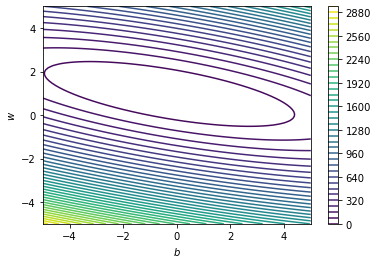

In [6]:
courbes_de_niveaux(f)

**Exercice 1.** ***Correction***

1. À partir des courbes de niveau de $f$ :
    1. Quelles sont approximativement les coordonnées du point critique ?
    *D'après le graphique le centre des ellipses a pour coordonnées $b=-0.5$, $w=1.5$*.
    
    2. Quels sont les signes du gradient (parmi $(+,+)$, $(-,-)$, $(+,-)$ ou $(-,+)$) en chacun des points suivants :
    (a) $(b,w)=(-2,3)$ : *Signe du gradient : $(0,+)$* ;
    (b) $(b,w)=(2,-2)$ : *Signe du gradient : $(-,-)$* ;
    (c) $(b,w)=(0,-4)$ : *Signe du gradient : $(-,-)$*.
    
    3. Comment interpréter la forte horizontalité des courbes de niveau ? Qu'est-ce qui l'explique ?
    *Les courbes de niveaux étant relativement horizontales, le gradient est plutôt vertical. Cela signifie que la dérivée par rapport à $b$ est beaucoup plus près de $0$, relativement à la dérivée par rapport à $w$.*

2. Déterminer analytiquement la valeur exacte $(b^*,w^*)$ du point critique.

*Je trouve $[\text{grad} f](b,w)=(6b+22w-20,22b+118w-108)$, donc les coordonnées du point critiques sont les solutions de $6b+22w-20=0$ et $22b+118w-108=0$. Je trouve :  $b\simeq -0.07$ et $w\simeq 0.93$.*

3. En partant de $(b[0],w[0])=(-2,2)$, et d'après `df(-2,2)=[12, 84]` :
    1. Quelle sont les coordonnées $(b[1],w[1])$ obtenues à l'issue de la première itération de l'algorithme de descente, dans les cas suivants : <br/> (a) $\tau=1$ ; (b) $\tau=1e-2$ ; (c) $\tau=1e-5$.
    2. Parmi ces valeurs de $\tau$, quelle est la valeur la plus performante pour cette première itération ? (c.à-d. minimisant la distance entre $W_1$ et $W^*$) ?

## Algorithme

In [7]:
def descente(gradf,W0,tau=0.01,tolerance=1e-6,nbiterations=1000):
    b=W0[0]
    w=W0[1]
    L=[]
    for i in range(nbiterations):
        g = gradf(b,w)
        if g[0]**2+g[1]**2< tolerance:
            print('L\'algorithme a convergé en',i,'itérations. \nSolution atteinte :\n b=',b,'\n w=',w,'\nGradient :',g)
            return L
        L.append([b,w])
        b=b-tau*g[0]
        w=w-tau*g[1]
    print('L\'algorithme n\'a pas convergé.\n Solution atteinte :\n b=',b,'\n w=',w,'\nGradient :',g)
    return L

### Calcul de la solution

In [14]:
Wlist=descente(df,[-4,4],1e-2,1e-4,1000)

L'algorithme a convergé en 363 itérations. 
Solution atteinte :
 b= -0.07669449221187702 
 w= 0.9295687067990768 
Gradient : [-0.009655403691573472, 0.0018285736297620758]


**Exercice 2.**

1. Représenter les données d'apprentissage ainsi que la droite de régression dans un repère.
2. Quelle est la valeur estimée de $y$ lorsque $x=1$, $x=3$, $x=5$, ou $x=7$ ?

### Représentation graphique de la trajectoire

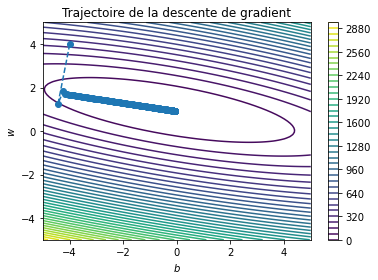

In [12]:
trajectoire(Wlist,f)

**Exercice 3.**

1. À partir de $W_0=(-4,4)$, et avec $\tau=10^{-3}$, donner, à 4 décimales près, la tolérance en-deçà de laquelle l'algorithme ne converge pas en au plus 3000 itérations.
2. À partir de $W_0=(-4,4)$, visualiser et interpréter la trajectoire dans les cas suivants :
    1. $\tau=0.015$, tolerance=1e-2, nbiterations=1000 ;
    2. $\tau=0.02$, tolerance=1e-2, nbiterations=5

**Exercice 4.**

1. Placer les points $(1,6)$, $(2,8)$, $(3,7)$, $(4,9)$ dans un repère du plan.
2. Modifier ce notebook afin de déterminer l'équation de la droite de régression de Y selon X.
3. Représenter cette droite dans le graphique de la question 1.